In [2]:
!pip3 install pickle5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 1.4 MB/s eta 0:00:00a 0:00:01


In [3]:
import pickle5 as pickle

with open("/kaggle/input/output202101/output_202101.pkl", "rb") as f:
    df_news = pickle.load(f)
        
df_news = pd.DataFrame(df_news)
print(df_news)

                     date                                              title  \
18215 1900-01-01 00:00:00  La fusión de los grandes icebergs es un paso c...   
20360 1900-01-01 00:00:00  HP y Fundación La Caixa llevan al espectador a...   
26177 1900-01-01 00:00:00  Condenado a una multa y al pago de daños el co...   
10927 1900-01-01 00:00:00  Club León empieza el Clausura mexicano defendi...   
51562 1900-01-01 00:00:00  Un conductor de autobús se enfrenta a 3 años d...   
...                   ...                                                ...   
33237 2021-02-16 11:31:00  Dancausa (Bankinter), sobre la subida de impue...   
42144 2021-02-25 17:17:00  Cs destaca las ayudas de la Junta para 22.000 ...   
44306 2021-04-28 17:14:00  Elecciones Cataluña 2021: ¿Cuántos votos 'vale...   
44273 2021-04-28 17:14:00  Elecciones Cataluña 2021: ¿Cómo funciona el si...   
48238 2021-05-13 16:37:00  Motorola desvela su propuesta de carga inalámb...   

                                       

In [4]:
!pip3 install gensim

In [5]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import gensim
import numpy as np
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
#from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary

In [6]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52043 entries, 18215 to 48238
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      52043 non-null  datetime64[ns]
 1   title     52043 non-null  object        
 2   body      52043 non-null  object        
 3   resource  52043 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.0+ MB


In [7]:
df_news['text'] = df_news['body']

In [8]:
#TODO a definir
black_list = ['más', 'mas', 'unir', 'paises', 'pais', 'espa', 'no', 'os', 'a', 'compa', 'acompa', 'off', 'and', 'grecia', 'the','it', 'to',
              'd',  'et',  'dame',  'il',  'dans', 'that',  'as',   'for',  'it',  'elections',  'would',  'this',  'with', 'york', 'obama', 'chavez']

In [9]:
def cleaner(word):
  word = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '', word, flags=re.MULTILINE)
  word = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', "", word)
  word = re.sub(r'ee.uu', 'eeuu', word)
  word = re.sub(r'\#\.', '', word)
  word = re.sub(r'\n', '', word)
  word = re.sub(r',', '', word)
  word = re.sub(r'\-', ' ', word)
  word = re.sub(r'\.{3}', ' ', word)
  word = re.sub(r'a{2,}', 'a', word)
  word = re.sub(r'é{2,}', 'é', word)
  word = re.sub(r'i{2,}', 'i', word)
  word = re.sub(r'ja{2,}', 'ja', word) 
  word = re.sub(r'á', 'a', word)
  word = re.sub(r'é', 'e', word)
  word = re.sub(r'í', 'i', word)
  word = re.sub(r'ó', 'o', word)
  word = re.sub(r'ú', 'u', word)  
  word = re.sub('[^a-zA-Z]', ' ', word)
  list_word_clean = []
  for w1 in word.split(" "):
    if  w1.lower() not in stopwords:
      list_word_clean.append(w1.lower())

  bigram_list = bigram[list_word_clean]
  out_text = lemmatization(" ".join(bigram_list))
  return out_text

In [10]:
def lemmatization(texts, allowed_postags=['NOUN']):
    texts_out = [ token.text for token in nlp(texts) if token.pos_ in 
                 allowed_postags and token.text not in black_list and len(token.text)>2]
    return texts_out

In [11]:
len(df_news.text.to_list())

52043

In [12]:
%%time
bigram = gensim.models.Phrases(df_news.text.to_list()) 

CPU times: user 3min 5s, sys: 194 ms, total: 3min 5s
Wall time: 3min 5s


In [13]:
bigram[df_news.text.to_list()[1000].split()]

['Los',
 'ultimos',
 'datos',
 'registrados',
 'en',
 'la',
 'provincia',
 'de',
 'Segovia',
 'sobre',
 'los',
 'casos',
 'de',
 'coronavirus',
 'han',
 'hecho',
 'que',
 'la',
 'Junta',
 'de',
 'Castilla',
 'y',
 'León',
 'haya',
 'adoptado',
 'este',
 'viernes',
 'la',
 'decisión',
 'de',
 'subir',
 'ese',
 'territorio',
 'al',
 'nivel',
 '4',
 'de',
 'alerta',
 'pandémica.',
 'Y',
 'es',
 'que,',
 'según',
 'ha',
 'anunciado',
 'el',
 'Gobierno',
 'regional',
 'en',
 'un',
 'comunicado,',
 'las',
 'cifras',
 'muestran',
 '«una',
 'situación',
 'de',
 'riesgo',
 'extremo,',
 'con',
 'transmisión',
 'comunitaria',
 'no',
 'controlada',
 'y',
 'sostenida',
 'de',
 'la',
 'infección',
 'por',
 'SARS-CoV-2',
 'que',
 'excede',
 'las',
 'capacidades',
 'del',
 'sistema',
 'sanitario».',
 'El',
 'territorio',
 'segoviano',
 'regresa',
 'así',
 'al',
 'máximo',
 'nivel',
 'de',
 'alerta',
 'tras',
 'varias',
 'semanas',
 'en',
 'el',
 'nivel',
 '3',
 'y',
 'equipara',
 'su',
 'situación',
 

In [14]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = set(stopwords.words('spanish'))

additional_stopwords=set(black_list)

stopwords = stop.union(additional_stopwords)

In [16]:
!python -m spacy download es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 13.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.2.0
    Uninstalling typing_extensions-4.2.0:
      Successfully uninstalled typing_extensions-4.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
tensorflow 2.6.4 requires absl-py~=0.10, but you have absl-py 1.0.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.21.6 which is incompatible.
tensorflow 2.6.4 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow 2.6.4 requires wrapt~=1.12.1, but you have wrapt 1.14.1 which is incompatible.
tensorflow-transform 1.8.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is in

In [17]:
import spacy
nlp = spacy.load("es_core_news_md")

In [18]:
df_news.text[0]

'MADRID, 1 Ene. (EUROPA PRESS) - Las autoridades de Turquía han prohibido este viernes de forma temporal la entrada al país de todas las personas procedentes de Reino Unido tras detectar quince casos de la nueva cepa de coronavirus. Según ha informado en su cuenta de Twitter el ministro de Sanidad turco, Fahrettin Koca, quince personas procedentes de territorio británico han dado positivo de la variante. Todas ellas, así como aquellos con los que han estado en contacto, se encuentran ahora en cuarentena. En este sentido, el ministro ha garantizado que la situación "está bajo control", si bien no ha dado más detalles sobre el caso ni ha especificado cuándo llegaron a Turquía. El país ha impuesto recientemente medidas de cuarentena y restricciones durante los fines de semana en un intento por frenar la expansión de la pandemia. Además, las autoridades sanitarias han hecho obligatoria la realización de una PCR antes de entrar en el país. Turquía, con 83 millones de habitantes, ha registra

In [19]:
cleaner(df_news.text[0])

['press',
 'autoridades',
 'viernes',
 'forma',
 'entrada',
 'personas',
 'casos',
 'cepa',
 'cuenta',
 'personas',
 'territorio',
 'variante',
 'asi',
 'contacto',
 'ministro',
 'control',
 'detalles',
 'caso',
 'turquia',
 'medidas',
 'restricciones',
 'fines',
 'semana',
 'intento',
 'expansion',
 'autoridades',
 'realizacion',
 'pcr',
 'millones',
 'habitantes',
 'millones',
 'casos']

In [20]:
%%time
df_news['text'] = df_news['text'].apply(cleaner)

CPU times: user 31min 10s, sys: 2.75 s, total: 31min 13s
Wall time: 31min 16s


In [21]:
dictionary = Dictionary(df_news['text'].to_list())
dictionary.compactify()
# Filter extremes
dictionary.filter_extremes(no_below=2, no_above=0.97, keep_n=None)
dictionary.compactify()

corpus = [dictionary.doc2bow(text) for text in df_news['text'].to_list()]

In [22]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary, random_state= 30)

In [23]:
def display_topics(model, model_type="lda"):
  for topic_idx, topic in enumerate(model.print_topics()):
    print ("Topic %d:" % (topic_idx))
    if model_type== "hdp":
      print (" ".join(re.findall( r'\*(.[^\*-S]+).?', topic[1])), "\n")
    else:
      print (" ".join(re.findall( r'\"(.[^"]+).?', topic[1])), "\n")

In [24]:
# hdpmodel.show_topics() 

display_topics(hdpmodel, model_type="hdp")

Topic 0:
millones  euros  personas  parte  press  medidas  casos  horas  empresas  enero 

Topic 1:
presidente  parte  press  personas  momento  vez  tiempo  elecciones  enero  euros 

Topic 2:
casos  personas  horas  press  centros  parte  enero  semana  medidas  datos 

Topic 3:
personas  press  casos  horas  parte  enero  medidas  dosis  semana  momento 

Topic 4:
falta  zona  campo  remate  rebote  tiro  juego  banda  parte  asistencia 

Topic 5:
temperaturas  horas  zonas  grados  aviso  metros  riesgo  precipitaciones  viento  rachas 

Topic 6:
press  personas  horas  policia  agentes  lugar  casos  enero  hombre  parte 

Topic 7:
press  personas  horas  casos  enero  parte  equipo  puntos  viernes  semana 

Topic 8:
press  personas  horas  casos  euros  millones  enero  parte  presidente  viernes 

Topic 9:
numeros  euros  enero  sorteo  loterias  bonoloto  sorteos  numero  euromillones  premios 

Topic 10:
press  personas  horas  parte  enero  vez  presidente  momento  vida  mu

In [25]:
def evaluate_graph(dictionary, corpus, texts, limit, model):
    """
    Function to display num_topics - LDA graph using c_v coherence
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        if model == 'lsi':
          lm = LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        else:
          lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(1, limit)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lm_list, c_v

In [26]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [27]:
display_topics(lsimodel)  # Showing the topics

Topic 0:
casos millones personas euros horas parte medidas falta coronavirus datos 

Topic 1:
falta zona campo remate rebote tiro juego casos banda parte 

Topic 2:
millones euros casos personas coronavirus horas contagios sorteo semana loteria 

Topic 3:
lanzamiento parte gol suspension distancia metros casos millones rebote euros 

Topic 4:
rebote tiro canasta zona campo remate encesta bar bandeja lanzamiento 

Topic 5:
casos millones personas euros lanzamiento presidente gol medidas press suspension 

Topic 6:
millones euros sorteo loteria premio premios numero horas serie numeros 

Topic 7:
personas casos millones dosis horas empresas vacuna presidente sector vacunas 

Topic 8:
personas horas presidente casos enero medidas coronavirus dosis restricciones semana 

Topic 9:
horas dosis vacuna vacunas euros presidente sorteo loteria numero premio 



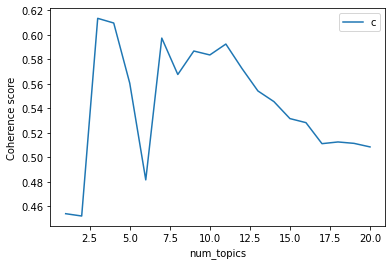

CPU times: user 7min 8s, sys: 1min 52s, total: 9min
Wall time: 8min 35s


In [28]:
%%time
lmlist_lsi, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=df_news['text'].to_list(), limit=21, model= "lsi")

In [29]:
display_topics(lmlist_lsi[2])

Topic 0:
casos millones personas euros horas parte medidas falta coronavirus datos 

Topic 1:
falta zona campo remate rebote tiro juego casos parte banda 

Topic 2:
euros casos millones sorteo loteria personas premio coronavirus premios horas 



In [30]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [31]:
display_topics(ldamodel)

Topic 0:
horas press zona enero viernes zonas ciudad metros hora vehiculos 

Topic 1:
personas dosis vacunas familias vacuna salud alimentos poblacion campa mujeres 

Topic 2:
rebote tiro violencia mujer presos grado prision fuerzas defensa delito 

Topic 3:
millones euros enero premios acciones febrero numeros parte precio valor 

Topic 4:
falta zona campo parte equipo juego lanzamiento partido remate distancia 

Topic 5:
empresas sector ayudas crisis mes actividad millones meses datos sectores 

Topic 6:
vida vez tiempo momento mundo dia familia redes gente forma 

Topic 7:
elecciones press presidente votos ley candidato candidatos gobierno febrero partidos 

Topic 8:
casos personas medidas horas centros coronavirus contagios semana numero habitantes 

Topic 9:
proyecto proyectos desarrollo euros servicios empresa programa calidad parte gestion 



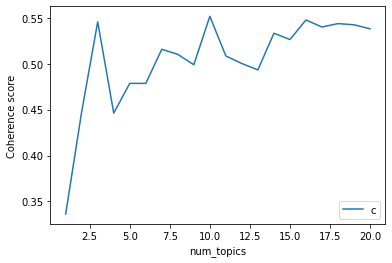

CPU times: user 13min 9s, sys: 17.2 s, total: 13min 27s
Wall time: 22min 24s


In [32]:
%%time
lmlist, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=df_news['text'].to_list(), limit=21, model= "lda")

In [33]:
ldamodel = lmlist[11]
lsimodel = lmlist_lsi[2]

lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [34]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=df_news['text'].to_list(), dictionary=dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=df_news['text'].to_list(), dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=df_news['text'].to_list(), dictionary=dictionary, window_size=10).get_coherence()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

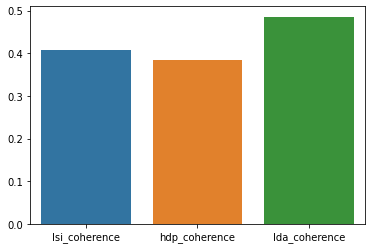

In [35]:
import seaborn as sns

coherences = [lsi_coherence, hdp_coherence, lda_coherence]
n = len(coherences)
x = ['lsi_coherence','hdp_coherence', 'lda_coherence']
sns.barplot(x, coherences)

In [36]:
display_topics(ldamodel)


Topic 0:
presidente salud press medidas gobierno ola ciudadanos momento campa gestion 

Topic 1:
casos personas coronavirus numero pacientes horas habitantes contagios datos incidencia 

Topic 2:
tiempo lanzamiento rebote distancia empresa forma uso datos tecnologia carga 

Topic 3:
mujer policia personas lugar press hombre delito agentes hechos horas 

Topic 4:
equipo mundo parte vida vez tiempo momento partido club programa 

Topic 5:
personas medidas press ciudad centros servicio servicios alcalde situacion municipios 

Topic 6:
falta zona campo parte proyecto metros remate juego obras tarjeta 

Topic 7:
elecciones votos press ley candidato candidatos febrero comicios voto acuerdo 

Topic 8:
alimentos estudio euros numeros sorteo premios investigadores cabo tratamiento productos 

Topic 9:
dosis mes personas vacunas vacuna datos diciembre semana enero noviembre 

Topic 10:
millones euros empresas sector ayudas proyectos crisis fondos parte sectores 

Topic 11:
horas alumnos zonas en

In [37]:
ldamodel_16 =lmlist[16]


In [38]:
display_topics(ldamodel_16)


Topic 0:
ley presidente press votos elecciones acuerdo candidatos derecho decision parte 

Topic 1:
casos medidas personas restricciones horas datos numero coronavirus semana habitantes 

Topic 2:
ciudad alcalde viviendas personas concejal ayuntamiento municipio calle vivienda centro 

Topic 3:
millones euros mes importe numero diciembre cifras ingresos press ejercicio 

Topic 4:
policia personas mujer agentes press horas delito lugar hechos hombre 

Topic 5:
horas zonas hielo temperaturas hora kilometros cruce enero press viernes 

Topic 6:
familias alimentos campa tiendas responsabilidad productos situacion medidas ayuda crisis 

Topic 7:
vida tiempo mundo vez momento familia dia gente cosas redes 

Topic 8:
empresa mercado empresas precio millones parte trimestre banca euros mes 

Topic 9:
febrero cultura obra enero premios teatro horas director programa edicion 

Topic 10:
personas dosis centros casos vacunas salud vacuna pacientes pruebas centro 

Topic 11:
servicio servicios tran

In [39]:
def format_topics_sentences(ldamodel=0, corpus=corpus, texts=0):
    # Init output
    sent_topics_df = pd.DataFrame()-n

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel, corpus=corpus, texts=df_news['text'].to_list())

In [40]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.0833,"presidente, salud, press, medidas, gobierno, o...",[]
1,1,0.0,0.0833,"presidente, salud, press, medidas, gobierno, o...",[]
2,2,0.0,0.0833,"presidente, salud, press, medidas, gobierno, o...",[]
3,3,0.0,0.0833,"presidente, salud, press, medidas, gobierno, o...",[]
4,4,0.0,0.0833,"presidente, salud, press, medidas, gobierno, o...",[]
5,5,0.0,0.0833,"presidente, salud, press, medidas, gobierno, o...",[]
6,6,0.0,0.0833,"presidente, salud, press, medidas, gobierno, o...",[]
7,7,0.0,0.0833,"presidente, salud, press, medidas, gobierno, o...",[]
8,8,0.0,0.0833,"presidente, salud, press, medidas, gobierno, o...",[]
9,9,0.0,0.0833,"presidente, salud, press, medidas, gobierno, o...",[]


In [41]:
df_news['labels'] = df_dominant_topic['Dominant_Topic']

In [42]:
df_news[['body', 'labels']].head(10)

,body,labels
18215,,0.0
20360,,5.0
26177,,11.0
10927,,0.0
51562,,0.0
22735,,11.0
7267,,7.0
35103,,0.0
28903,,3.0
23748,,9.0


In [43]:
df_news[ df_news['labels'] == 2.0].head().body

800    La crisis sanitaria ha marcado el discurso y e...
649    El presidente de la Junta de Extremadura, Guil...
779    No hay dinero y nadie tiene ni un chavo para a...
602    Se cuenta que uno de los delegados que el Rein...
355    MADRID, 1 Ene. (EUROPA PRESS) - El presidente ...
Name: body, dtype: object

In [44]:
#Latent Dirichlet Allocation MODEL con texto limpio

In [45]:
df_news = pd.read_csv("/kaggle/input/textolimpio/texto_limpio.csv")
df_news

,Unnamed: 0,ticker,date,body,r_adj,label,texto_limpio
0,6,ANA,2021-01-07 08:29:03.000,"El Ibex 35 ha tocado por momentos los 8.400, n...",0.050625,1,ibex 35 tocado momentos niveles veía marzo ini...
1,7,ANA,2021-01-07 10:28:03.000,"El presidente de Estados Unidos, Joe Biden, se...",0.012283,1,presidente joe hecho control dos cámaras congr...
2,8,ANA,2021-01-07 12:21:00.000,"MADRID, 7 Ene. (EUROPA PRESS) - El Ibex 35 caí...",0.012283,1,7 ibex 35 caía media sesión llevaba selectivo ...
3,9,ANA,2021-01-07 14:35:00.000,"HUELVA, 7 Ene. (EUROPA PRESS) - Las obras de a...",0.012283,1,7 obras adecuación desdoble carretera acceso m...
4,10,ANA,2021-01-07 15:28:06.000,El asalto al capitolio no ha asus...,0.012283,1,asalto capitolio asustado principales índices ...
...,...,...,...,...,...,...,...
21336,53473,TEF,2021-12-30 06:13:41.000,"“Todos tendrán su baja, tal y como se ha hecho...",-0.019280,-1,tal hecho principio mensaje tranquilizador dab...
21337,53474,TEF,2021-12-30 08:27:05.000,La última sesión del año en la Bolsa española ...,-0.019280,-1,última sesión año bolsa española transcurrido ...
21338,53475,TEF,2021-12-30 08:31:09.000,17:46La Comunidad Valenciana notifica 10.889 n...,-0.019280,-1,comunidad valenciana notifica nuevos contagios...
21339,53476,TEF,2021-12-30 08:52:26.000,19:12Compromís pide a Ximo Puig «evaluar todas...,-0.019280,-1,pide ximo puig todas posibles frente coronavir...


In [46]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import gensim
import numpy as np
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
#from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary

In [47]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = set(stopwords.words('spanish'))

additional_stopwords=set(black_list)

stopwords = stop.union(additional_stopwords)

In [49]:
!python -m spacy download es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 11.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [50]:
import spacy
nlp = spacy.load("es_core_news_md")

In [51]:
df_news['text'] = df_news['texto_limpio']

In [52]:
len(df_news.text.to_list())

21341

In [53]:
%%time
bigram = gensim.models.Phrases(df_news.text.to_list()) 

CPU times: user 1min 1s, sys: 11.1 ms, total: 1min 1s
Wall time: 1min 1s


In [54]:
bigram[df_news.text.to_list()[1000].split()]

['cede',
 'viernes',
 'suma',
 'tres',
 'semanas',
 '29',
 'ibex',
 '35',
 'anotado',
 'caída',
 'mes',
 'marcado',
 'rebrotes',
 'nuevas',
 'restricciones',
 'vacunación',
 'aunque',
 'primer',
 'mes',
 'año',
 'comenzó',
 'mediados',
 'mes',
 'cobraron',
 'temores',
 'tercera',
 'oleada',
 'venido',
 'acompañada',
 'nuevas',
 'restricciones',
 'frenar',
 'contagios',
 'problemas',
 'distribución',
 'mientras',
 'francia',
 'amenaza',
 'nuevo',
 'reino',
 'unido',
 'sopesa',
 'posibilidad',
 'extender',
 'confinamiento',
 'cuanto',
 'distribución',
 'cumpliendo',
 'plazos',
 'inmunización',
 'podría',
 'tardar',
 'llegar',
 'ibex',
 '35',
 'borrado',
 'ganancias',
 'iniciales',
 'anotarse',
 'tres',
 'semanas',
 'consecutivas',
 'balance',
 'semana',
 'descenso',
 'según',
 'apuntado',
 'analista',
 'xtb',
 'joaquín',
 'estímulo',
 'fiscal',
 'podría',
 'retrasarse',
 'mediados',
 'mientras',
 'buena',
 'lectura',
 'resultados',
 'empresariales',
 'logrado',
 'revertir',
 'plano',
 'p

In [55]:
cleaner(df_news.text[0])

['momentos',
 'niveles',
 'marzo',
 'inicio',
 'elecciones',
 'control',
 'posibilidad',
 'paquetes',
 'estimulo',
 'tono',
 'subidas',
 'bolsas',
 'bolsa',
 'banca',
 'valores',
 'perdidas',
 'indice',
 'hoteles',
 'ganancias',
 'gamesa',
 'dato',
 'zona',
 'indicadores',
 'consumo',
 'caida',
 'noviembre',
 'frente',
 'confianza',
 'deficit',
 'aumento',
 'nivel',
 'paro',
 'noticia',
 'asalto',
 'grupo',
 'horas',
 'imagenes',
 'sesion',
 'control',
 'posibilidad',
 'agenda',
 'facilidad',
 'foco',
 'empresas',
 'poder',
 'mercado',
 'empresas',
 'preocupaciones',
 'medidas',
 'planes',
 'sector',
 'paquetes',
 'estimulo',
 'aumento',
 'gasto',
 'posibiles',
 'medidas',
 'victoria',
 'aumento',
 'asi',
 'ganancias',
 'medidas',
 'inversores',
 'regulacion',
 'incremento',
 'mayoria',
 'democratas',
 'camaras',
 'cambios',
 'link',
 'alzas',
 'termino',
 'jueves',
 'victoria',
 'mercado',
 'estimulos',
 'huida',
 'deuda',
 'aumento',
 'niveles',
 'tipos',
 'tesoro',
 'millones',
 'eu

In [56]:
%%time
df_news['text'] = df_news['text'].apply(cleaner)

CPU times: user 15min 13s, sys: 531 ms, total: 15min 14s
Wall time: 15min 15s


In [57]:
dictionary = Dictionary(df_news['text'].to_list())
dictionary.compactify()
# Filter extremes
dictionary.filter_extremes(no_below=2, no_above=0.97, keep_n=None)
dictionary.compactify()

corpus = [dictionary.doc2bow(text) for text in df_news['text'].to_list()]

In [58]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [59]:
display_topics(ldamodel)

Topic 0:
puntos precio sesion referencia bolsas ola bono euro riesgo dolar 

Topic 1:
millones euros entidad valor beneficio empresas periodo fondos ingresos entidades 

Topic 2:
personas casos centros medidas salud centro servicios dosis parte datos 

Topic 3:
rebote falta tiro equipo temporada tiempo falla canasta premios partido 

Topic 4:
energia precio acciones euros mercado dividendo electricidad precios millones gas 

Topic 5:
aeropuerto presidente horas vuelos ministro lunes martes agentes semana aerolinea 

Topic 6:
mercado renta inversores semana sector aumento valores precios mes bolsa 

Topic 7:
personas presidente empresas mujeres tipo situacion vez parte caso vida 

Topic 8:
empresas proyecto desarrollo proyectos empresa director sector presidente parte tecnologia 

Topic 9:
millones euros operacion oferta red mercado empresa venta precio participacion 



In [60]:
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [61]:
lda_coherence = CoherenceModel(topics=ldatopics, texts=df_news['text'].to_list(), dictionary=dictionary, window_size=10).get_coherence()

In [62]:
coherences = [lda_coherence]
n = len(coherences)

In [63]:
def format_topics_sentences(ldamodel=0, corpus=corpus, texts=0):
    # Init output
    sent_topics_df = pd.DataFrame()-n

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel, corpus=corpus, texts=df_news['text'].to_list())

In [64]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.6698,"mercado, renta, inversores, semana, sector, au...","[momentos, niveles, marzo, inicio, elecciones,..."
1,1,6.0,0.7589,"mercado, renta, inversores, semana, sector, au...","[presidente, control, camaras, elecciones, cam..."
2,2,0.0,0.7948,"puntos, precio, sesion, referencia, bolsas, ol...","[sesion, contexto, asalto, parte, seguidores, ..."
3,3,2.0,0.6536,"personas, casos, centros, medidas, salud, cent...","[obras, carretera, marzo, infraestructura, mej..."
4,4,6.0,0.6291,"mercado, renta, inversores, semana, sector, au...","[asalto, capitolio, indices, jornada, hora, ca..."
5,5,0.0,0.6635,"puntos, precio, sesion, referencia, bolsas, ol...","[sesion, jueves, ascenso, contexto, asalto, pa..."
6,6,0.0,0.8562,"puntos, precio, sesion, referencia, bolsas, ol...","[sesion, viernes, subida, enteros, maximos, ra..."
7,7,0.0,0.7993,"puntos, precio, sesion, referencia, bolsas, ol...","[plano, sesion, enteros, derrota, elecciones, ..."
8,8,9.0,0.2784,"millones, euros, operacion, oferta, red, merca...","[transformaciones, construccion, motor, vuelo,..."
9,9,8.0,0.3250,"empresas, proyecto, desarrollo, proyectos, emp...","[dificultad, transporte, competitividad, frent..."


In [65]:
df_news['labels'] = df_dominant_topic['Dominant_Topic']

In [66]:
df_news[['body', 'labels']].head(50)

,body,labels
0,"El Ibex 35 ha tocado por momentos los 8.400, n...",6.0
1,"El presidente de Estados Unidos, Joe Biden, se...",6.0
2,"MADRID, 7 Ene. (EUROPA PRESS) - El Ibex 35 caí...",0.0
3,"HUELVA, 7 Ene. (EUROPA PRESS) - Las obras de a...",2.0
4,El asalto al capitolio no ha asus...,6.0
5,"MADRID, 7 Ene. (EUROPA PRESS) - El Ibex 35 ha ...",0.0
6,"MADRID, 8 Ene. (EUROPA PRESS) - El Ibex 35 ha ...",0.0
7,"MADRID, 8 Ene. (EUROPA PRESS) - El Ibex 35 cot...",0.0
8,"Las transformaciones del turismo, las telecomu...",9.0
9,La dificultad para competir con Renfe Mercancí...,8.0


In [67]:
df_news[ df_news['labels'] == 2.0].head(20).body

3      HUELVA, 7 Ene. (EUROPA PRESS) - Las obras de a...
17     No se prevé cortar el tráfico en la vía aunque...
26     MADRID, 25 Ene. (EUROPA PRESS) - Acciona se ha...
50     Si quieres estar al día de todas las últimas h...
51     Estar informado sobre las novedades de hoy es ...
86     PALENCIA, 13 Ene. (EUROPA PRESS) - La director...
105    La constructora estadounidense Flatiron, filia...
118    La decisión del Ministerio de Fomento de no ha...
119    El ahora identificado se encontraba hospedado ...
133    MADRID, 11 ene. (EDIZIONES) El paso del tempor...
139    Señala que se tomará una decisión sobre las ay...
155    GRANADA, 13 Ene. (EUROPA PRESS) - Aena ha adju...
164    SANTIAGO DE COMPOSTELA, 13 Ene. (EUROPA PRESS)...
174    MADRID, 15 Ene. (EUROPA PRESS) - Ciudadanos qu...
181    MADRID, 17 Ene. (EUROPA PRESS) - Más de 62.000...
182    Más de 62.000 personas han trabajado en el des...
199    PALMA, 28 Ene. (EUROPA PRESS) - El diputado de...
204    PALMA, 28 Ene. (EUROPA P